In [23]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from boruta import BorutaPy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv("..\\dataset_machine_learning.csv")

In [3]:
df

,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,yr_built,renovated,yr_renovated,zipcode,city_encoded,lat,long,sqm_living15,sqm_lot15
0,0,790000,3,2.50,241.55,441.29,1.0,False,0,4,9,1951,False,1951,98117,11,47.6833,-122.400,221.11,441.29
1,0,555000,4,2.50,307.51,603.87,2.0,False,0,3,8,2012,False,2012,98065,15,47.5150,-121.870,221.11,464.52
2,0,440000,4,2.25,200.67,754.28,1.0,False,0,3,8,1966,False,1966,98006,21,47.5443,-122.177,171.87,836.13
3,0,295000,2,2.50,151.43,127.09,2.0,False,0,3,7,2009,False,2009,98106,11,47.5489,-122.363,147.72,214.23
4,0,470000,5,2.50,205.32,896.98,1.0,False,0,3,8,1976,False,1976,98011,14,47.7698,-122.222,193.24,802.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19251,377,183000,3,1.00,108.70,680.05,1.0,False,0,3,7,1962,False,1962,98188,11,47.4685,-122.282,189.52,680.05
19252,377,359000,2,2.75,127.28,105.91,2.0,False,0,3,8,2009,False,2009,98133,11,47.7052,-122.343,127.28,101.26
19253,378,450000,5,2.00,173.73,682.28,1.5,False,0,3,7,1960,False,1960,98007,21,47.5951,-122.144,173.73,710.71
19254,387,445500,2,1.75,129.14,619.66,1.0,False,0,3,6,1941,False,1941,98115,11,47.6914,-122.308,85.47,592.72


Mise en forme des dataset Train/Test

In [4]:
X1 = df['sqm_living'].values.reshape(-1,1)
X2 = df['grade'].values.reshape(-1,1)
X3 = df[['grade', 'sqm_living']]
X4 = df.drop(columns=['price'])
y = df['price'].values.reshape(-1,1)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y, test_size=0.2)
X4_train, X4_test, y4_train, y4_test = train_test_split(X1, y, test_size=0.2)

df_mean_price = df.groupby('grade').agg(mean_price=('price', 'mean'))

Xmean = df_mean_price.index.values.reshape(-1,1)
ymean = df_mean_price['mean_price'].values.reshape(-1,1)

Création des modeles

In [35]:
poly_model = PolynomialFeatures()
linear_model_for_poly = LinearRegression()

RandomForest_model = RandomForestRegressor()

model_SVR = SVR()

Modele lineaire ElasticNet

Recherche du meilleur modele

In [37]:
eNet_model = ElasticNet()

linear_param_grid = {
                        "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                        "l1_ratio": np.arange(0.0, 1.0, 0.1),
                        "fit_intercept" : [True,False],
                        "max_iter": [1, 5, 10],
                        'tol' : [0.00001, 0.0001, 0.001]}


grid = GridSearchCV(eNet_model, linear_param_grid, scoring='r2', cv=10)
grid.fit(X4_train, y4_train)

print(f"Best score = {grid.best_score_}")
print(f"Best param = {grid.best_params_}")

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.904e+14, tolerance: 1.492e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.877e+14, tolerance: 1.484e+10 Linear regression models with null weight for the l1 regularization term are more ef

Best score = 0.4755420962611326
Best param = {'alpha': 100, 'fit_intercept': True, 'l1_ratio': 0.7000000000000001, 'max_iter': 1, 'tol': 1e-05}


0.44256674490317194

Création des modeles

In [49]:
eNet_model = ElasticNet()
eNet_model_best = ElasticNet(alpha=100, l1_ratio=0.7, max_iter=1, tol=0.00001)

Comparaison des scores

In [50]:
# Modele simple
eNet_model.fit(X4_train, y4_train)

score_simple = eNet_model.score(X4_test, y4_test)
print(f"Score simple = {score_simple}")


score_cv = cross_val_score(eNet_model, X4_train, y4_train, cv=5).mean()
print(f"Mean score CV = {score_cv}")

# Meilleur modele
eNet_model_best.fit(X4_train, y4_train)

best_score_simple = eNet_model_best.score(X4_test, y4_test)
print(f"Best score simple = {best_score_simple}")

best_score_cv = cross_val_score(eNet_model_best, X4_train, y4_train, cv=5).mean()
print(f"Mean best score CV = {best_score_cv}")

Score simple = 0.4425071378461317
Mean score CV = 0.47667461417456136
Best score simple = 0.44256674490317194
Mean best score CV = 0.4766702193435483


Verification overfitting

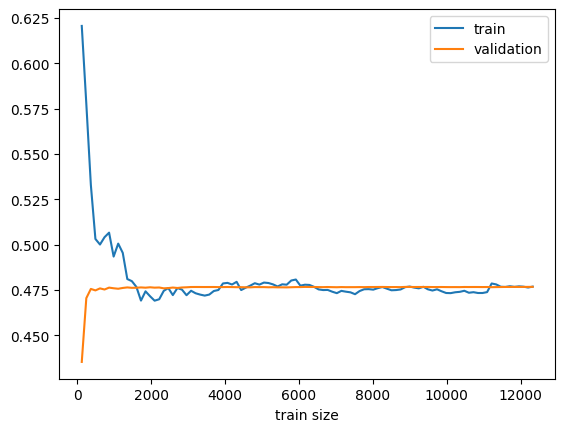

In [52]:
N, train_score, val_score = learning_curve(eNet_model_best, X4_train, y4_train, train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train size")
plt.legend()

Le score stagne avec la taille de l'echantillon d'entrainement alors nous ne sommes pas en overfitting!

Modele KNN

Recherche du meilleur modele

In [14]:
knn_model = KNeighborsRegressor()

knn_param_grid = {
                    "n_neighbors" : range(1,100), 
                    "metric" : ["euclidean", "manhattan", "minkowski"],
                    "weights" : ["uniform", "distance"],
                    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
                  }

grid = GridSearchCV(knn_model, knn_param_grid, scoring='r2', cv =10)
grid.fit(X4_train, y4_train)

print(f"Best score = {grid.best_score_}")
print(f"Best param = {grid.best_params_}")

Best score = 0.4986547917330326
Best param = {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 88, 'weights': 'uniform'}


0.475821130940143

Création des modeles

In [46]:
knn_model = KNeighborsRegressor()
knn_model_best = KNeighborsRegressor(algorithm="brute", metric="manhattan", n_neighbors=88, weights="uniform")

Comparaison des scores

In [47]:
# Modele simple
knn_model.fit(X4_train, y4_train)

score_simple = knn_model.score(X4_test, y4_test)
print(f"Score simple = {score_simple}")


score_cv = cross_val_score(knn_model, X4_train, y4_train, cv=5).mean()
print(f"Mean score CV = {score_cv}")

# Meilleur modele
knn_model_best.fit(X4_train, y4_train)

best_score_simple = knn_model_best.score(X4_test, y4_test)
print(f"Best score simple = {best_score_simple}")

best_score_cv = cross_val_score(knn_model_best, X4_train, y4_train, cv=5).mean()
print(f"Mean best score CV = {best_score_cv}")

Score simple = 0.41504976386425585
Mean score CV = 0.41524907195932836
Best score simple = 0.475821130940143
Mean best score CV = 0.4956498481789914


Verification overfitting

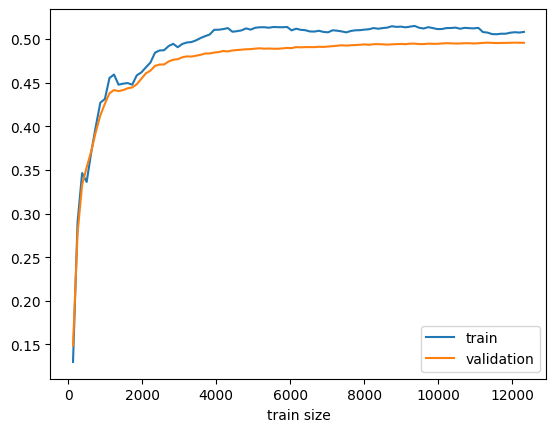

In [53]:
N, train_score, val_score = learning_curve(knn_model_best, X4_train, y4_train, train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train size")
plt.legend()

Le score augmente avec la taille de l'echantillon d'entrainement alors nous ne sommes pas en overfitting!